In [1]:
import numpy as np 
import random
from bronx.stdtypes.date import daterangex as rangex
import matplotlib.pyplot as plt
from preprocessing.load_data import *
from preprocessing.normalisations import *
from preprocessing.patches import *
# import warnings

# warnings.filterwarnings("ignore")

In [2]:
data_train_location = '/cnrm/recyf/Data/users/danjoul/dataset/data_train/'
data_valid_location = '/cnrm/recyf/Data/users/danjoul/dataset/data_test/'
data_test_location = '/cnrm/recyf/Data/users/danjoul/dataset/data_test/'
data_static_location = '/cnrm/recyf/Data/users/danjoul/dataset/'
baseline_location = '/cnrm/recyf/Data/users/danjoul/dataset/baseline/'
model_name = 'weights.{epoch:02d}-{val_loss:.2f}.hdf5'


'''
Setup
'''
# params = ["t2m", "rr", "rh2m", "tpw850", "ffu", "ffv", "tcwv", "sp", "cape", "hpbl", "ts", "toa","tke","u700","v700","u500","v500", "u10", "v10"]
params_in = ['t2m']
params_out = ['t2m']
static_fields = []
dates_train = rangex(['2020070100-2021053100-PT24H']) # à modifier
dates_valid = rangex(['2022020100-2022022800-PT24H', '2022040100-2022043000-PT24H', '2022060100-2022063000-PT24H']) # à modifier
dates_test = rangex(['2022030100-2022033100-PT24H', '2022050100-2022053100-PT24H']) # à modifier
resample = 'r'
echeances = range(6, 37, 3)
output_dir = '/cnrm/recyf/Data/users/danjoul/unet_experiments/interp/bl/'



"""
Load Data
"""

X_df = load_X(
    dates_test, 
    echeances,
    params_in,
    data_test_location,
    data_static_location,
    static_fields = static_fields,
    resample=resample
)

y_df = load_y(
    dates_test,
    echeances,
    params_out,
    data_test_location
)

missing day (y): 2022-05-24T00:00:00


In [3]:
patch_size = 64
n_patches  = 2

X_patches, y_patches = extract_patches(X_df, y_df, patch_size, patch_size, n_patches)
X_patches.t2m[0].shape

(64, 64)

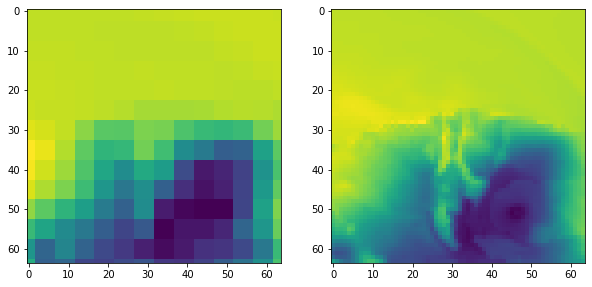

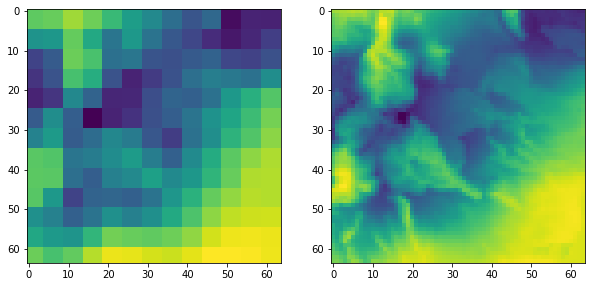

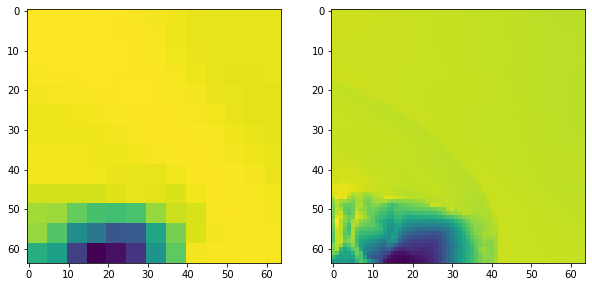

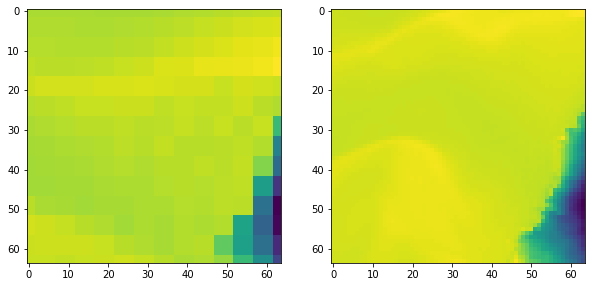

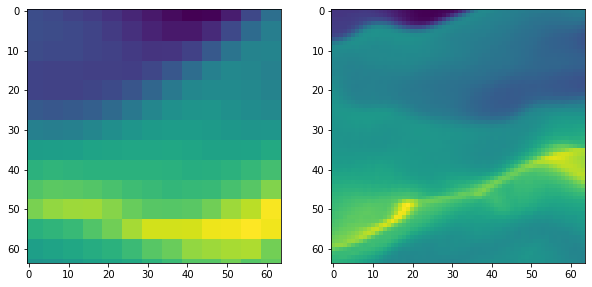

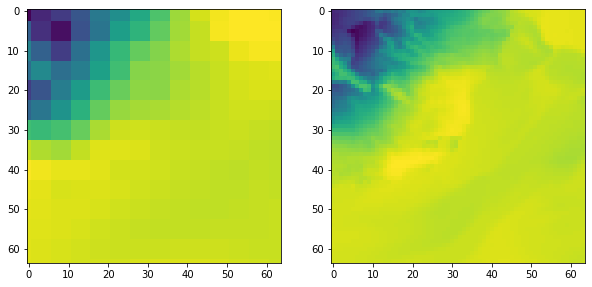

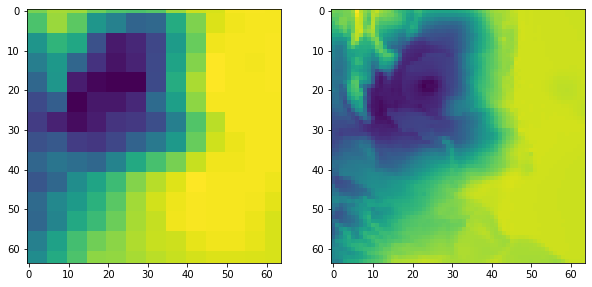

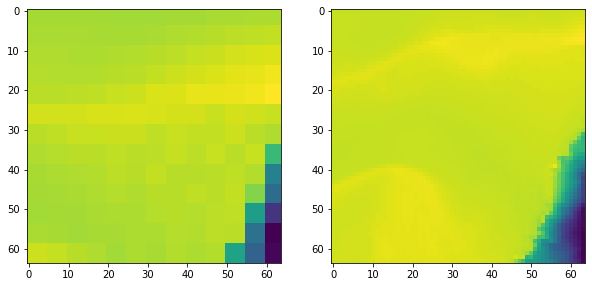

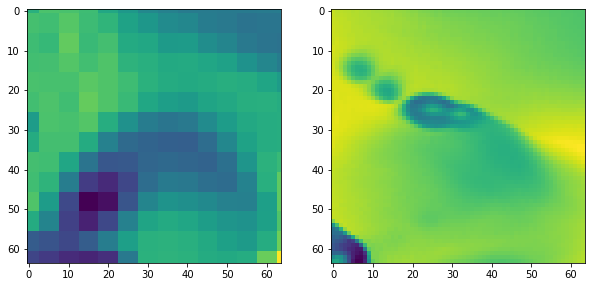

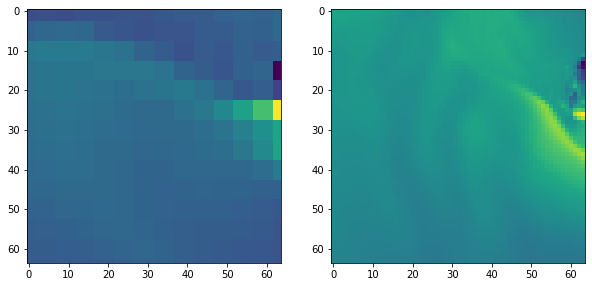

In [4]:
for i in range(10):
    fig, axs = plt.subplots(ncols=2, figsize=(10,5))
    im = axs[0].imshow(X_patches.t2m[i])
    im = axs[1].imshow(y_patches.t2m[i])

In [5]:
print(len(X_df))
print(len(X_patches))

682
1364
